# California house price prediction

In [1]:
#Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
##set the working directory
os.chdir("C:/Users/Aurangzeb Alam/Desktop/DataSet")

In [3]:
#Check the working Directory
os.getcwd()

'C:\\Users\\Aurangzeb Alam\\Desktop\\DataSet'

In [4]:
#Load the Data
Dataset = pd.read_csv("housing.csv")

In [5]:
#Head of the Dataset
Dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
#Info of the Data
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
#Columns
Dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
X=Dataset[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'ocean_proximity']]
y=Dataset[['median_house_value']]

In [9]:
# filling missing values
X.isnull().sum()
X.fillna(X.mean(),inplace=True)
X.info()

C:\Anaconda\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [10]:
#convert categorical values into numerical values
X=pd.get_dummies(X,columns=["ocean_proximity"])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [12]:
#Standardize data
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [13]:
#Import Linear Regression Model and instantiate a Linear Regression Object
from sklearn.linear_model import LinearRegression
Linear_Regration = LinearRegression()  # Linear_Regration is the object of class Linear Regression

In [14]:
# Learning from Data using Linear Regression
Linear_Regration.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
#Coefficient of Linear Regression
Linear_Regration.coef_

array([[-100268.33846481,  -95824.97827431,   20820.28024817,
          -7441.67024637,   24765.41258348,  -40550.45555849,
          28171.01606279,   84926.26688774,  -26606.49999159,
         -66050.80686132,  144853.43793331,  -29438.46584017,
         -22757.66524023]])

In [16]:
#Intercept values 
Linear_Regration.intercept_

array([237600.48896616])

In [17]:
#Apply my learning data and the prediction
y_prediction = Linear_Regration.predict(X_test)

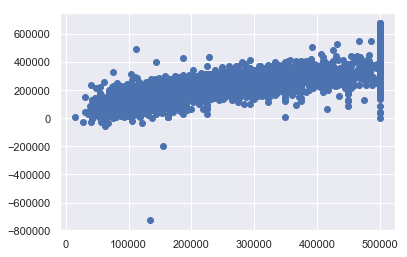

In [18]:
plt.scatter(y_test,y_prediction)

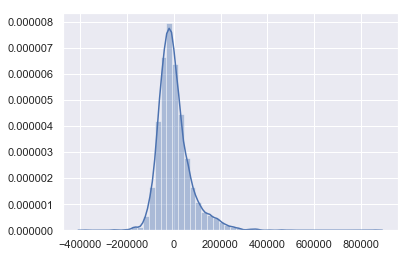

In [19]:
#Plot the Resudual Error
sns.distplot(y_test - y_prediction)

In [20]:
#Publish the accuracy metrics
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_prediction) #Mean Absolute Error

50769.499762553

In [21]:
# RMSE = root mean squared error = on an average your prediction is of by 5 units
np.sqrt(metrics.mean_absolute_error(y_test, y_prediction))

225.32088177209187

In [22]:
#r2 = % of variations explained by model = overall what amount of base error is model able to reduce
metrics.r2_score(y_test, y_prediction)

0.6284901502093299

# Decision Tree

In [23]:
#Decision Tree algorithm
from sklearn import tree

In [24]:
Decision_tree = tree.DecisionTreeClassifier()
Decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
prediction = Decision_tree.predict(X_test)
prediction

array([282000., 500001., 132000., ..., 210000.,  45000., 337500.])

In [26]:
from sklearn import metrics
metrics.accuracy_score(prediction,y_test)

0.031169250645994833